<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
print(type(X))

<class 'numpy.ndarray'>


### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [3]:
# you can write your code here

import math

#Split the data into  Xtrain(60),  Xcv(20),  Xtest(20)
print("Total Dataset (Before spliting): ",X.shape)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=12)
X_train, X_CV, y_train, y_CV = train_test_split( X_train, y_train, test_size=0.25, random_state=12)

print("X_train (60%):", X_train.shape)
print("X_CV (20%):",X_CV.shape)
print("X_test (20%):",X_test.shape)
    

Total Dataset (Before spliting):  (5000, 5)
X_train (60%): (3000, 5)
X_CV (20%): (1000, 5)
X_test (20%): (1000, 5)


In [5]:
#Train  SVC(gamma=0.001,C=100)  on the ( Xtrain ,  ytrain )
#Ref: https://stackoverflow.com/questions/20113206/scikit-learn-svc-decision-function-and-predict#:~:text=Python%27s%20SVM%20implementation%20uses%20one-vs-one.%20That%27s%20exactly%20what,the%20just%20the%20regular%20binary%20SVM%20decision%20boundary

clf = SVC(gamma=0.001,C=100,random_state=12)
clf.fit(X_train,y_train)

#Get the decision boundry values  fcv  on the  Xcv  data i.e.  fcv  = decision_function( Xcv ) you need to implement this decision_function()
#Define decision_function for svm

gamma = 0.001
def decision_function( sv, nv, a, b, X):
    # calculate the kernels
    k = [math.exp(-gamma * np.dot((vi - X), vi - X)) for vi in sv]
    #print(k.shape)

    # define the start and end index for support vectors for each class
    start = [sum(nv[:i]) for i in range(len(nv))]
    end = [start[i] + nv[i] for i in range(len(nv))]
    #print(len(nv))
    #print(start)
    #print(end)

    # calculate: sum(a_p * k(x_p, x)) between every 2 classes
    
    c = [ sum(a[ i ][p] * k[p] for p in range(start[j], end[j])) +
          sum(a[j-1][p] * k[p] for p in range(start[i], end[i]))
                for i in range(len(nv)) for j in range(i+1,len(nv))]
    

    # add the intercept
    return [sum(x) for x in zip(c, b)]
#print(clf.support_vectors_)
#k = kernel(clf.support_vectors_, X_CV[0])
#print(len(k))

fcv = []
for i,X in enumerate(X_CV):
    fcv.append(decision_function(clf.support_vectors_,clf.n_support_,clf.dual_coef_,clf.intercept_,X)[0])    

decision_Func_CV_fromsvm = clf.decision_function(X_CV)
print("**********fcv********************* ")
print(fcv[0:10])
print("**********clf.decision_function(Xcv)********************* ")

print(decision_Func_CV_fromsvm[0:10])


**********fcv********************* 
[-3.4302657404611487, -3.0443986142697064, -1.188622388183543, -0.4208564050010717, 1.5256612283167816, 0.1883064121332756, -2.8687024637862883, -0.47832228149371425, 2.5284867300154623, 2.6875984607807517]
**********clf.decision_function(Xcv)********************* 
[-3.43026574 -3.04439861 -1.18862239 -0.4208564   1.52566123  0.18830641
 -2.86870246 -0.47832228  2.52848673  2.68759846]


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [6]:
#Apply SGD algorithm with ( fcvfcv ,  ycvycv ) and find the weight  WW  intercept  bb  Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)

from sklearn.linear_model import SGDClassifier
clf2 = SGDClassifier()
unique, counts = np.unique(y_train, return_counts=True)
#print(unique[0],counts[0])
N_minus = counts[0]
N_plus = counts[1]
y_plus = ((N_plus+1)/(N_plus+2))
y_minus =(1/(N_minus+2))
y_CV_modified =np.where(y_CV == 0, y_minus, y_plus)
print(type(y_CV))
print(type(y_CV_modified))
#print(fcv.shape)
#clf2.fit(fcv.reshape(-1, 1),y_CV_modified)
#class_weights = clf2.coef_[0]
#print(class_weights)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
#Initialize weights 


def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(row_vector)
    b = 0
    return w,b


In [8]:
row_vector = X_train[0] 
w,b = initialize_weights(row_vector)
print('w =',(w))
print('b =',str(b))


w = [0. 0. 0. 0. 0.]
b = 0


In [9]:
#Grader function - 1 


dim=X_train[0] 
w,b = initialize_weights(dim)
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)


True

In [10]:
#Compute sigmoid 

#$sigmoid(z)= 1/(1+exp(-z))$


import math

def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sigmoid = 1/(1+math.exp(-z))
    return sigmoid


In [11]:
#Grader function - 2


def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)


True

In [12]:
#$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$


#def logloss(y_true,y_pred):
    # you have been given two arrays y_true and y_pred and you have to calculate the logloss
    #while dealing with numpy arrays you can use vectorized operations for quicker calculations as compared to using loops
    #https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
    #https://www.geeksforgeeks.org/vectorized-operations-in-numpy/
    #write your code here
#    n=len(y_true)
#    loss =(-1)*(1/n)*np.sum((y_true*np.log10(y_pred)) + ((1-y_true)*np.log10(1-y_pred)))
#    return loss

def sig(w,x,b):
    return(1/(1+math.exp(-(np.dot(x,w)+b))))


def log_loss(w,b,X,Y):
    N = len(X)
    sum_log = 0
    for i in range(N):
        sum_log += Y[i]*np.log10(sig(w,X[i],b))+ (1-Y[i])*np.log10(1-sig(w,X[i],b))
    return -1*sum_log/N



In [13]:
#Grader function - 3 


#round off the value to 8 values
#def grader_logloss(true,pred):
def grader_logloss(w,b,X,Y):
  loss=logloss(w,b,X,Y)
  assert(np.round(loss,6)==0.076449)
  return True
#true=np.array([1,1,0,1,0])
#pred=np.array([0.9,0.8,0.1,0.8,0.2])
#grader_logloss(true,pred)


In [14]:
#Compute gradient w.r.to  'w' 


#$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ 



#make sure that the sigmoid function returns a scalar value, you can use dot function operation
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    #print("w",w)
    #print("x",x)
    #print("b",b)
    #print(np.dot(w,x))
    #print(sigmoid(np.dot(w,x)+b))
    dw = (x*(y-sigmoid(np.dot(w,x)+b))) - ((alpha/N)*w)
    #print(dw)
    return dw


In [15]:
#Grader function - 4 


def grader_dw(x,y,w,b,alpha,N):
  grad_dw=gradient_dw(x,y,w,b,alpha,N)
  assert(np.round(np.sum(grad_dw),5)==4.75684)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
grad_b=0.5
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)


True

In [16]:
#Compute gradient w.r.to 'b' 


#$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$


#sb should be a scalar value
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    db = y-sigmoid(np.dot(w,x)+b)  
    return db


In [17]:
#Grader function - 5 


def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(np.round(grad_db,4)==-0.3714)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0.5
grad_b=0.1
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)


True

In [18]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)
 


In [19]:
#Implementing logistic regression

def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    
    loss = []
    w,b = initialize_weights(X_train[0]) # Initialize the weights
    N_train = len(X_train)
    for epoch in range(0,epochs):
        print("epoch ",epoch)
        for point_idx in range(0,N_train):
            grad_dw=gradient_dw(X_train[point_idx],y_train[point_idx],w,b,alpha,N_train)
            #print(grad_dw)
            grad_db=gradient_db(X_train[point_idx],y_train[point_idx],w,b)
            #print(grad_dw)
            #Updating weight vector w
            w = w +(alpha*grad_dw)
            b = b +(alpha*grad_db)   
        print("updated w: ",w)
        print("updated b:",b)
        loss.append(log_loss(w,b,X_train,y_train))

    return w,b,loss


In [20]:

alpha=0.001
eta0=0.001
N=len(X_train)
epochs=20
w,b,loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)
print()
print("Updated final w vector:")
print(w)
w_mag=np.dot(w.T,w)
#print(w_mag)
#print()
#print(loss)


epoch  0
updated w:  [ 0.02117625 -0.02837846 -0.24916815 -0.31360013  0.74242944]
updated b: -0.34338091950424815
epoch  1
updated w:  [ 0.03135685 -0.06601553 -0.39986092 -0.5042512   1.1742522 ]
updated b: -0.4695941630682364
epoch  2
updated w:  [ 0.03787557 -0.09657705 -0.50620721 -0.63899031  1.47563837]
updated b: -0.5325412211813059
epoch  3
updated w:  [ 0.04277749 -0.1210008  -0.58764087 -0.74221493  1.70556446]
updated b: -0.5719027802871021
epoch  4
updated w:  [ 0.04682098 -0.14101812 -0.65314439 -0.82526462  1.89020044]
updated b: -0.6006061881749659
epoch  5
updated w:  [ 0.05034404 -0.15788235 -0.70760991 -0.89433026  2.04353872]
updated b: -0.6237050244054272
epoch  6
updated w:  [ 0.0535158  -0.17243071 -0.75399258 -0.95315538  2.17396428]
updated b: -0.6434539818242859
epoch  7
updated w:  [ 0.05642848 -0.1852249  -0.79421046 -1.00417065  2.28690414]
updated b: -0.6609688746829775
epoch  8
updated w:  [ 0.05913615 -0.19665063 -0.82957683 -1.0490404   2.38607318]
upda

Text(0.5,1,'Loss Function Vs Epoches')

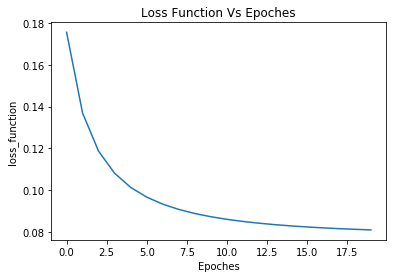

In [21]:
# Plot loss fuction vs epoches
epochs_list = [i for i in range(epochs)]
#print(epochs_list)
plt.plot(epochs_list,loss)
plt.xlabel("Epoches")
plt.ylabel("loss_function")
plt.title("Loss Function Vs Epoches")

In [22]:
#For a given data point from  Xtest ,  P(Y=1|X)=11+exp(−(W∗ftest+b))P(Y=1|X)=11+exp(−(W∗ftest+b))  
#where  ftestftest  = decision_function( Xtest ), W and b will be learned as metioned in the above step

for x in X_test:
    f = decision_function(clf.support_vectors_,clf.n_support_,clf.dual_coef_,clf.intercept_,x)[0]
    #print(f)
    #print(w_mag)
    prob = (1/(math.exp(-(w_mag*f))))
    print("For ",x,"probability is",prob)

For  [ 0.56205839  0.95914624  0.47392055  0.64027871 -0.65230023] probability is 3.758523503664629e-15
For  [-1.12868355  0.5259836  -0.11371356 -0.11703555  0.79121172] probability is 830535.4615067666
For  [ 0.77827558 -1.04397189  0.04636056  0.00756786 -1.0188899 ] probability is 6.18884665408059e-14
For  [-0.10445915 -1.35403628 -0.55372204 -0.7593877   0.56623399] probability is 507368629.2360574
For  [-1.28523571  0.04712579  0.15703589  0.19905871 -0.44336442] probability is 6.130809612347924e-10
For  [-1.47325101  1.7701801   0.43925358  0.63609024  0.13509864] probability is 1.192941926321686e-07
For  [ 1.20189375 -0.15709433  0.12650684  0.15091977 -0.52090478] probability is 9.572770630202965e-10
For  [ 1.49952363 -0.58600389  0.13007707  0.13463546 -0.89191499] probability is 2.8263162283543374e-13
For  [-1.07690686 -0.15079241  0.23152617  0.28282199 -0.83857399] probability is 1.319945615617648e-14
For  [-0.26724655 -1.15451929  0.07747155  0.04120209 -1.20735807] proba

For  [ 0.19569218  1.39891509  0.42026167  0.59432369 -0.11814028] probability is 1.5292614601195814e-09
For  [-0.47530866  0.68653284 -0.01305608  0.0168661   0.61643294] probability is 1395.096574169726
For  [ 2.1676674  -1.71610792  0.06316327 -0.00390666 -1.63475979] probability is 1.7742016888019816e-19
For  [-0.06780266 -1.17102703 -0.47156443 -0.64758079  0.46719981] probability is 7085249.6833602255
For  [ 1.16515594  0.90042372 -0.01377109  0.02632189  0.79817387] probability is 232309.00705415747
For  [-0.90672914  0.61616376 -0.20738771 -0.23005193  1.15497986] probability is 36583899172.07829
For  [-1.62750656 -2.40017274  0.03232418 -0.07565731 -2.11413309] probability is 5.907230032018664e-25
For  [ 1.37699753 -2.85652684 -0.08317289 -0.24247028 -2.14202057] probability is 2.15066710151437e-23
For  [-0.72851149 -0.27024987 -0.10333014 -0.14255991  0.09091404] probability is 0.09800458419673823
For  [-1.18601719 -2.56855718 -0.36346211 -0.57975707 -1.03834081] probability 

For  [-0.19155852  0.13923777 -0.02934979 -0.03003878  0.20713504] probability is 0.24985867887544155
For  [-1.59249652  0.12439521  0.4452613   0.56396676 -1.26486455] probability is 3.934986873345217e-21
For  [-0.11634465 -0.46189688 -0.00502419 -0.02865027 -0.37227023] probability is 2.8325671952592336e-07
For  [ 1.18620812  1.20955729  0.41619279  0.58006066 -0.26457631] probability is 1.5881142046543293e-10
For  [ 0.53560153 -2.42432442  0.08136389 -0.0153757  -2.28521486] probability is 8.57179095843663e-27
For  [ 0.61229472 -1.66198783 -0.00976905 -0.09267716 -1.36504682] probability is 8.162347089526053e-17
For  [-0.62813193 -2.13560299 -0.0610427  -0.17984866 -1.60492554] probability is 6.008409530437062e-19
For  [ 0.7449977   0.65802146  0.52843587  0.69401693 -1.07271475] probability is 1.0011205261708777e-19
For  [ 0.71800397 -0.29860216  0.22010631  0.26135843 -0.9275282 ] probability is 6.224658407446588e-15
For  [-0.44387873  1.11725757  0.37100756  0.51897306 -0.2030984

For  [ 1.32045392  0.08865948  0.39852589  0.50367421 -1.15113909] probability is 8.653547309562168e-19
For  [-0.36104299 -1.12717407 -0.48545573 -0.66286527  0.5467294 ] probability is 55246291.69005446
For  [ 0.81936179 -1.46833657 -0.0126372  -0.08689896 -1.19367381] probability is 5.084212169571452e-15
For  [ 1.19006586 -0.35781626 -0.03454114 -0.06060004 -0.19413237] probability is 8.718364875715704e-05
For  [ 1.73851335  1.08334999  0.47946596  0.65323867 -0.56509583] probability is 7.642060854619291e-14
For  [ 0.9904016  -1.1642176   0.02278543 -0.02779315 -1.04732627] probability is 6.963337278992777e-14
For  [ 1.19053798  1.02498498 -0.00437694  0.04412191  0.8738426 ] probability is 986663.1909054256
For  [ 0.04886057  0.7263147   0.40676574  0.54486019 -0.64122451] probability is 1.8947099307538698e-14
For  [-0.6799954  -2.79184312 -0.08179969 -0.23761903 -2.09194734] probability is 1.5642040541944246e-23
For  [ 0.68231943 -0.38863797  0.27394769  0.3244683  -1.16868004] pro

For  [ 1.29888152 -0.55300726 -0.38706893 -0.51179097  0.72612817] probability is 802194350.8739351
For  [-0.75613636  0.10849648  0.2886068   0.36689727 -0.7964607 ] probability is 8.57510970948345e-15
For  [-0.10978102 -1.96660347 -0.58436544 -0.82743283  0.14627469] probability is 60579.65006978385
For  [ 0.86174528  0.64510946  0.36234257  0.48526445 -0.5727773 ] probability is 5.193882068271431e-13
For  [ 0.41464864 -0.2613405  -0.15102078 -0.20188874  0.24505258] probability is 19.053938770606553
For  [ 0.47722272 -0.83405937  0.10940004  0.09672034 -1.03654847] probability is 6.922553778718518e-15
For  [-0.53888686 -0.34001424  0.00872117 -0.00552749 -0.31223096] probability is 6.444541584478831e-07
For  [ 1.03913078  0.35315408  0.21497604  0.28647308 -0.3646608 ] probability is 2.8471250288622584e-09
For  [ 0.68231109  0.23577956  0.34801506  0.44750051 -0.87231238] probability is 8.154608789921488e-16
For  [ 1.81188846  0.71350112  0.31784093  0.43281048 -0.37851568] probabil

For  [ 0.64284421  1.05667138 -0.09420826 -0.06691005  1.1766929 ] probability is 5910472595.657787
For  [-1.66979926 -0.80306857 -0.12625953 -0.1970792  -0.28582596] probability is 2.873686300429606e-05
For  [-0.74787666  0.12181051 -0.07123947 -0.08337318  0.32132705] probability is 7.796360328244819
For  [-1.84591836  0.03912745  0.45464891  0.57160341 -1.36530823] probability is 3.378746760769967e-22
For  [-2.12357927 -0.81540881 -0.42834219 -0.57620904  0.63279067] probability is 74526885.80413604
For  [ 0.60079687 -1.22744038 -0.5195724  -0.71046869  0.56748167] probability is 330951251.08106446
For  [ 0.48639016 -0.07920483  0.27583389  0.3418076  -0.91473933] probability is 1.6826168310708439e-15
For  [ 0.99620866  1.59633067  0.67658695  0.9250732  -0.74068816] probability is 3.993171614741284e-18
For  [-0.80728865  0.92299216  0.59414032  0.7891735  -1.05235237] probability is 1.0637481189316293e-20
For  [ 0.62194202  2.11718488 -0.11791544 -0.04529092  2.1398035 ] probabilit

For  [-0.12560669  0.71214484 -0.16240464 -0.16903948  1.0972138 ] probability is 4063024948.0247536
For  [ 0.71067496  0.46582444  0.36807607  0.48377204 -0.74090276] probability is 9.323608305597836e-15
For  [-1.25061418  2.48225331  0.70656156  1.00550997 -0.08921492] probability is 6.040860373793687e-13
For  [ 0.11069175  1.52742404 -0.07591038 -0.02119823  1.51557703] probability is 4400950986886.4795
For  [-2.07646113  0.593083    0.42208306  0.5576059  -0.80016488] probability is 2.1905304305155806e-16
For  [0.86913975 2.17551412 0.57870696 0.83045305 0.04648811] probability is 1.3114496620127455e-09
For  [ 0.06191703 -0.8994007   0.11411871  0.09947085 -1.10590765] probability is 9.690429324925702e-16
For  [-1.87010319  1.55651908  0.400804    0.57756936  0.07399097] probability is 8.767596645194619e-08
For  [ 0.37565182 -0.97436512  0.03519707 -0.00305206 -0.92613094] probability is 4.882702049153927e-13
For  [ 1.07414561  0.29648831 -0.29323578 -0.35309755  1.15064413] probab

For  [ 0.14951604  0.0497888   0.40364721  0.50821038 -1.19951678] probability is 8.931434532925016e-20
For  [ 1.40000738  0.18219484  0.27586828  0.35450173 -0.69542363] probability is 5.370419595520211e-13
For  [ 1.18366548 -1.01281665  0.03262311 -0.00813838 -0.95049201] probability is 5.916268259004081e-13
For  [ 1.33174202 -2.30706996 -0.07915239 -0.21084003 -1.69316504] probability is 4.75403035218382e-19
For  [-0.09072009 -1.22084319 -0.22006103 -0.33483881 -0.34804843] probability is 0.00010493600820707251
For  [0.83242364 1.08741263 0.02190316 0.08007421 0.84542751] probability is 193130.52697994906
For  [ 1.29723309 -0.9035474   0.21574549  0.22661626 -1.42191466] probability is 1.8444432012943371e-19
For  [-0.32479989  0.19505772  0.01936045  0.03370039  0.10419544] probability is 0.006504012375641519
For  [ 1.54518343 -0.31530399 -0.42605206 -0.54913559  1.04554091] probability is 3744164595009.831
For  [ 0.48427833  0.14479035 -0.31248866 -0.38456464  1.08251448] probabili

For  [-1.22612559 -1.08304953  0.00492192 -0.04624917 -0.92425852] probability is 5.548442287496734e-13
For  [-0.04222591  0.69461132  0.37131769  0.49890672 -0.55882554] probability is 2.8115669945406155e-13
For  [-0.6792445  -0.55788917  0.04000537  0.02312942 -0.59132357] probability is 4.989005162109967e-10
For  [-2.27616126  1.48467589  0.49608306  0.69348426 -0.27932039] probability is 3.00270861280617e-12
For  [-0.62358407  1.06931577  0.48924874  0.66481802 -0.60696063] probability is 3.2607465018977593e-15
For  [-0.42945255 -0.1346429  -0.32622366 -0.41529948  0.89019383] probability is 2530475100.30314
For  [-0.91132239 -0.18307597  0.24591187  0.29928593 -0.90991254] probability is 1.9210821583853114e-15
For  [-1.22932002 -1.84293677 -0.65845546 -0.91428814  0.47792595] probability is 585421072.537554
For  [ 0.16839614 -1.01242815 -0.0830472  -0.15306331 -0.5944525 ] probability is 1.4861893512783181e-08
For  [-0.69956523 -1.08879313  0.04100265 -0.00131525 -1.04003645] prob

For  [ 0.69428442  1.06116801  0.53388649  0.72035819 -0.7510715 ] probability is 9.984095080661299e-17
For  [ 0.22326461 -1.28940578 -0.4244713  -0.59429871  0.22300905] probability is 9267.193907074476
For  [-0.80508483 -2.27259362 -0.12445474 -0.26593877 -1.52490988] probability is 1.5906424945940954e-17
For  [ 1.07965073  1.01487637  0.43523314  0.59449763 -0.48654693] probability is 6.479437161836803e-13
For  [-0.57244694 -1.20398593  0.09643428  0.06256979 -1.30719571] probability is 1.1626931799392999e-17
For  [ 1.42070526 -0.45112461 -0.37726909 -0.49458017  0.78151265] probability is 2454004776.2145767
For  [ 0.2944533   1.36688023 -0.06622603 -0.01683289  1.35103331] probability is 102009106487.43663
For  [ 0.98547179 -1.61731684  0.33406989  0.34034121 -2.38493509] probability is 3.5977140392686375e-30
For  [ 0.7221195  -1.76345295 -0.61930976 -0.86138878  0.42426323] probability is 139422861.79641166
For  [-1.32704099  0.45701346  0.51274506  0.66462689 -1.19318991] probabi

For  [ 1.0447783  -0.81492497 -0.14793958 -0.22481978 -0.22910707] probability is 0.0005836126567755688
For  [-0.6988881   1.23954201 -0.08684893 -0.04883779  1.30756463] probability is 43216298774.21243
For  [-0.91027606  0.53984292 -0.0705222  -0.06224273  0.6700218 ] probability is 18421.27692588405
For  [ 0.76700611 -0.43629931  0.10313483  0.10812008 -0.68339777] probability is 2.972277976146449e-11
For  [-0.65901463 -0.00192831 -0.03593199 -0.04511885  0.10888068] probability is 0.026559746843552924
For  [-1.74674071 -0.23113305  0.48701978  0.59908669 -1.69171559] probability is 1.0765607355827397e-25
For  [-0.06043946  1.17349498 -0.06910388 -0.0297984   1.19755391] probability is 3093082538.376939
For  [-0.10319527 -0.80094616 -0.45205063 -0.60521758  0.71783981] probability is 1380294713.702737
For  [ 0.87192989  0.72614222  0.47239294  0.62708772 -0.84318833] probability is 7.61224894445318e-17
For  [-0.51386932 -0.87174456 -0.01591302 -0.06213035 -0.68281469] probability is